###### Full Name: Abdullah Al Rakin
##### Course Name: CSC 457/557 - Data Analysis, Decision Making, and Visualization
##### Project Name: Leveraging LinkedIn Data to Identify Key Factors of Hiring Decisions

## Import all necessary libraries

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read the dataset (https://www.kaggle.com/datasets/arshkon/linkedin-job-postings)

In [108]:
df = pd.read_csv('/Users/abdullahalrakin/Desktop/Project Dataset/job_postings.csv')

## Convert 'expiry' column to datetime

In [109]:
df['expiry'] = pd.to_datetime(df['expiry'], unit='ms')
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms')

## Create the target variable for classification

In [110]:
df['employment_status'] = np.random.choice([0, 1], size=len(df))

## Defining features and target for classification

In [111]:
features = ['company_id', 'title', 'max_salary', 'med_salary', 'min_salary', 'formatted_work_type', 'location', 'original_listed_time', 'remote_allowed', 'views', 'application_type', 'expiry', 'formatted_experience_level', 'skills_desc', 'work_type']
X = df[features]
y = df['employment_status']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   job_id                      33246 non-null  int64         
 1   company_id                  32592 non-null  float64       
 2   title                       33246 non-null  object        
 3   description                 33245 non-null  object        
 4   max_salary                  11111 non-null  float64       
 5   med_salary                  2241 non-null   float64       
 6   min_salary                  11111 non-null  float64       
 7   pay_period                  13352 non-null  object        
 8   formatted_work_type         33246 non-null  object        
 9   location                    33246 non-null  object        
 10  applies                     16238 non-null  float64       
 11  original_listed_time        33246 non-null  datetime64

## Identify numerical and categorical columns

In [112]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

## Create transformers for numerical and categorical columns

In [113]:
numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Visualization no.01: Salary Distributions

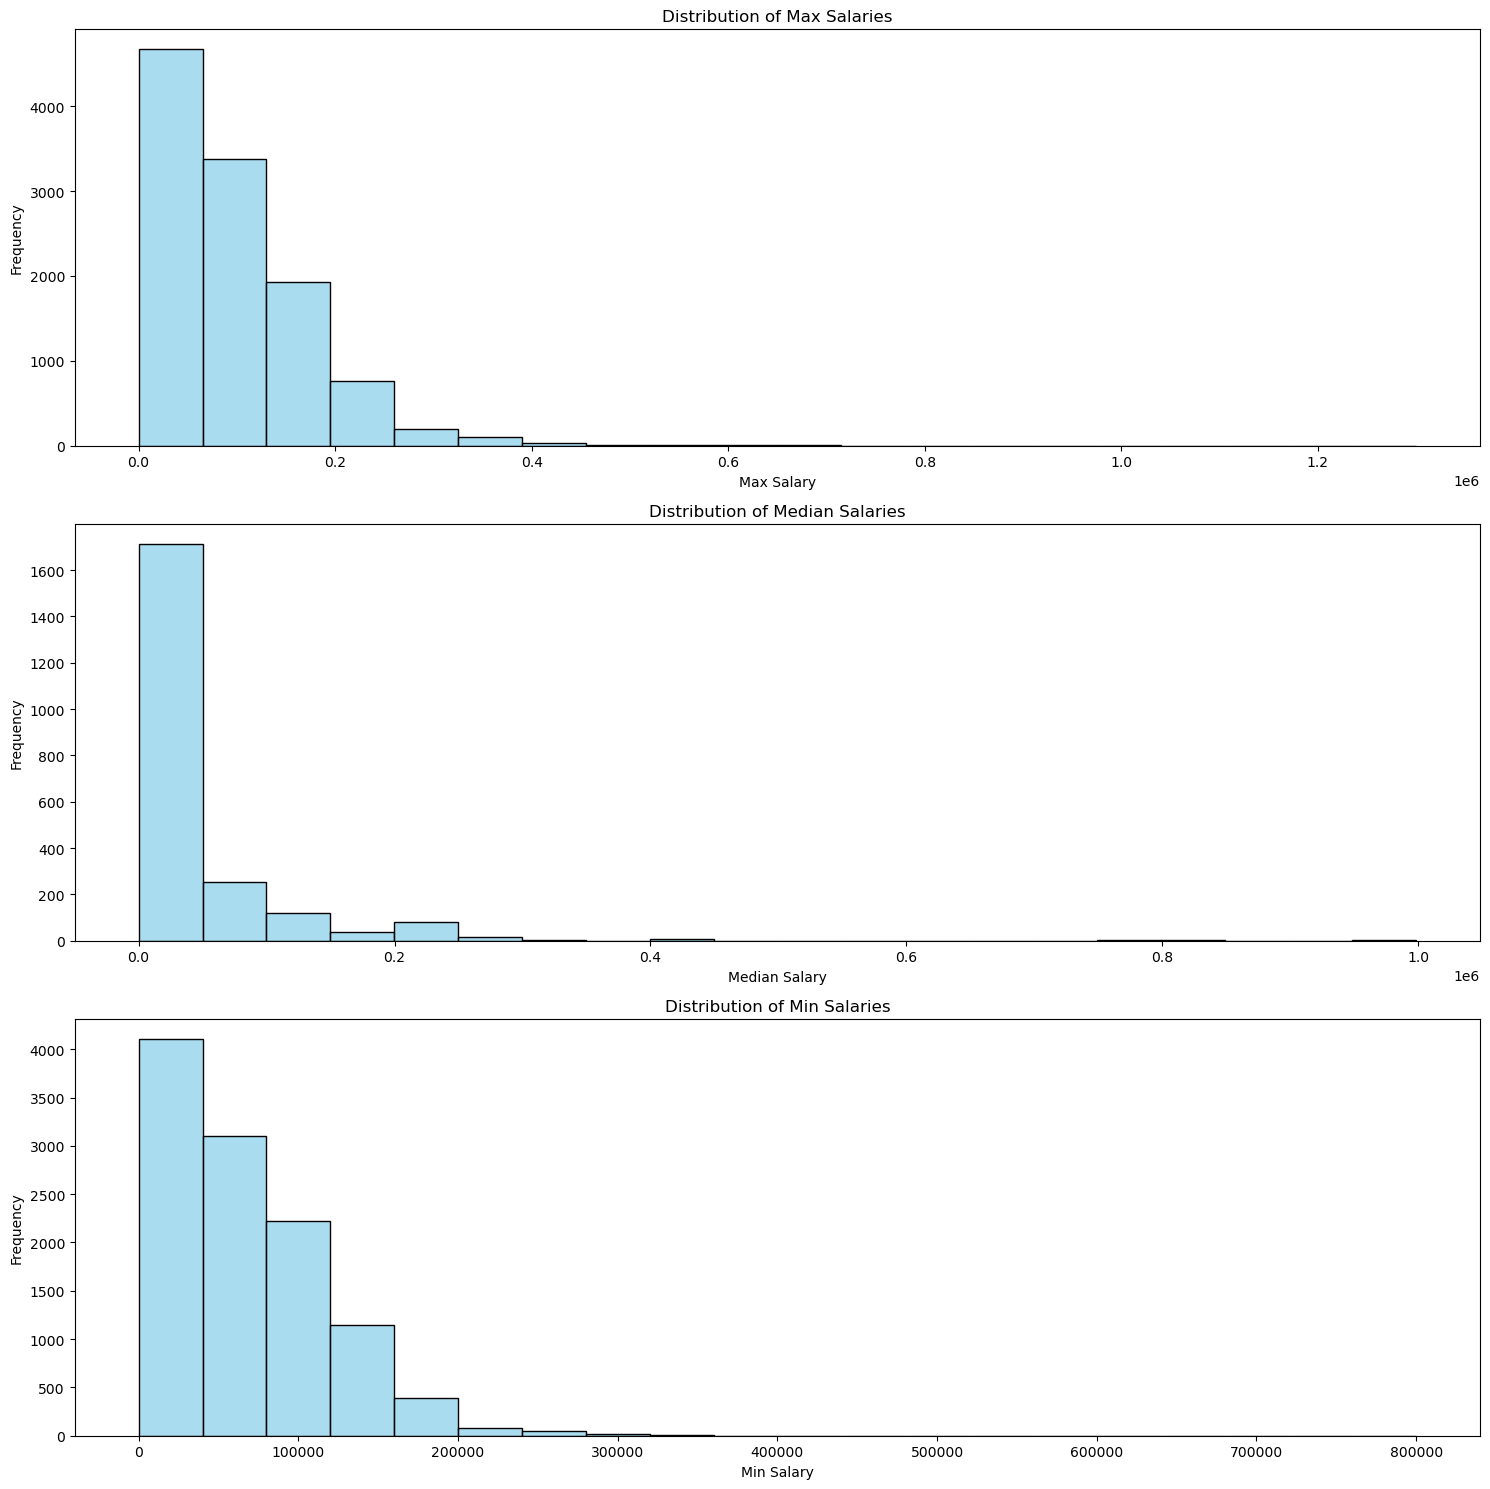

In [114]:
# Explanation: The following visualizations display the distribution of salary components (Maximum, Median & Minimum).

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
sns.histplot(df, x='max_salary', bins=20, color='skyblue', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Max Salaries')
axes[0].set_xlabel('Max Salary')
axes[0].set_ylabel('Frequency')

sns.histplot(df, x='med_salary', bins=20, color='skyblue', edgecolor='black', alpha=0.7, ax=axes[1])
axes[1].set_title('Distribution of Median Salaries')
axes[1].set_xlabel('Median Salary')
axes[1].set_ylabel('Frequency')

sns.histplot(df, x='min_salary', bins=20, color='skyblue', edgecolor='black', alpha=0.7, ax=axes[2])
axes[2].set_title('Distribution of Min Salaries')
axes[2].set_xlabel('Min Salary')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualization no.02: Distribution of Job Types

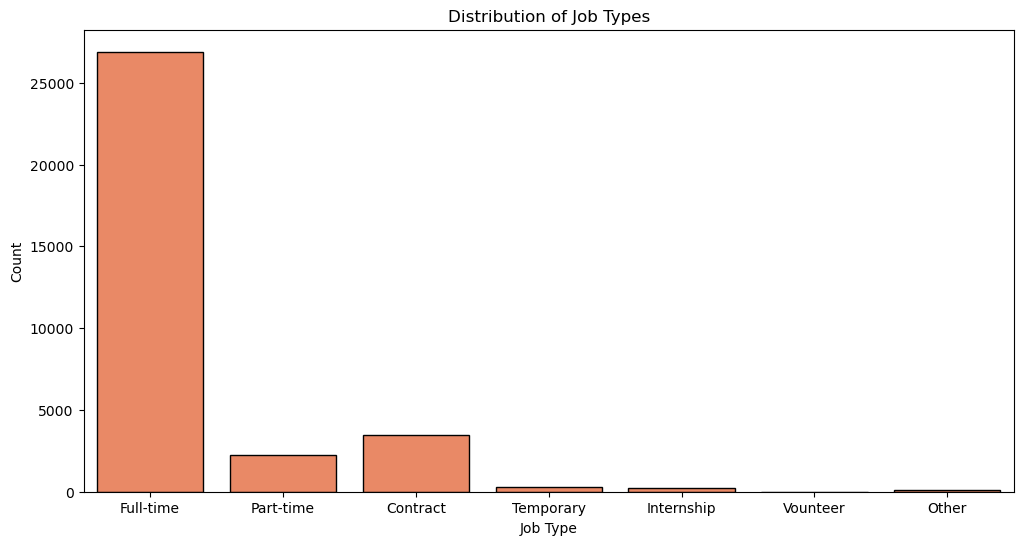

In [115]:
# Explanation: This visualization illustrates the distribution of job types.

job_type_order = ['Full-time', 'Part-time', 'Contract', 'Temporary', 'Internship', 'Vounteer', 'Other']

plt.figure(figsize=(12, 6))
sns.countplot(x='formatted_work_type', data=df, color='coral', edgecolor='black', order=job_type_order)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

## Visualization no.03: Distribution of Experience Levels

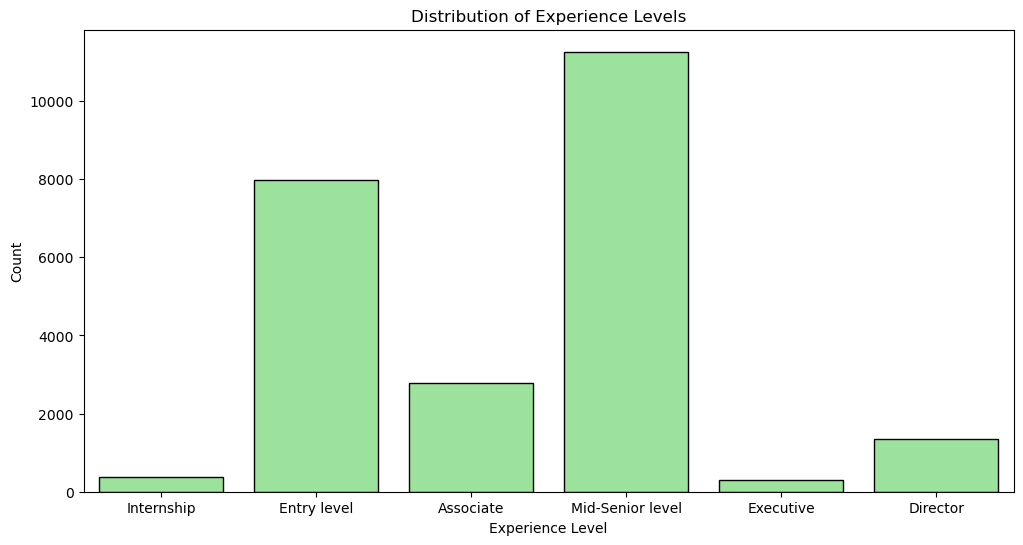

In [116]:
# This visualization presents the distribution of experience levels.

experience_order = ['Internship', 'Entry level', 'Associate', 'Mid-Senior level', 'Executive', 'Director']

plt.figure(figsize=(12, 6))
sns.countplot(x='formatted_experience_level', data=df, color='lightgreen', edgecolor='black', order=experience_order)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

## Visualization no.04: Remote Work Availability by Experience Level

<Figure size 1200x600 with 0 Axes>

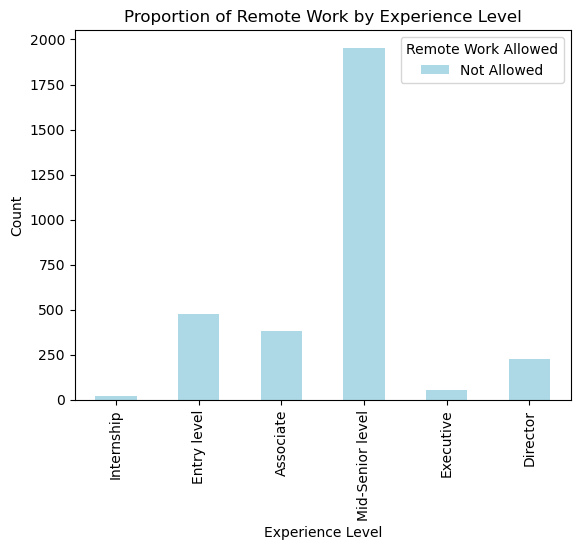

In [117]:
# Explanation: The following visualization shows the proportion of remote work by experience level.

experience_order = ['Internship', 'Entry level', 'Associate', 'Mid-Senior level', 'Executive', 'Director']

plt.figure(figsize=(12, 6))
experience_remote_counts = pd.crosstab(df['formatted_experience_level'], df['remote_allowed'])
experience_remote_counts = experience_remote_counts.reindex(experience_order, axis=0, fill_value=0)
experience_remote_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Proportion of Remote Work by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Remote Work Allowed', labels=['Not Allowed', 'Allowed'])
plt.show()

## Visualization no.05: Job Posting Locations

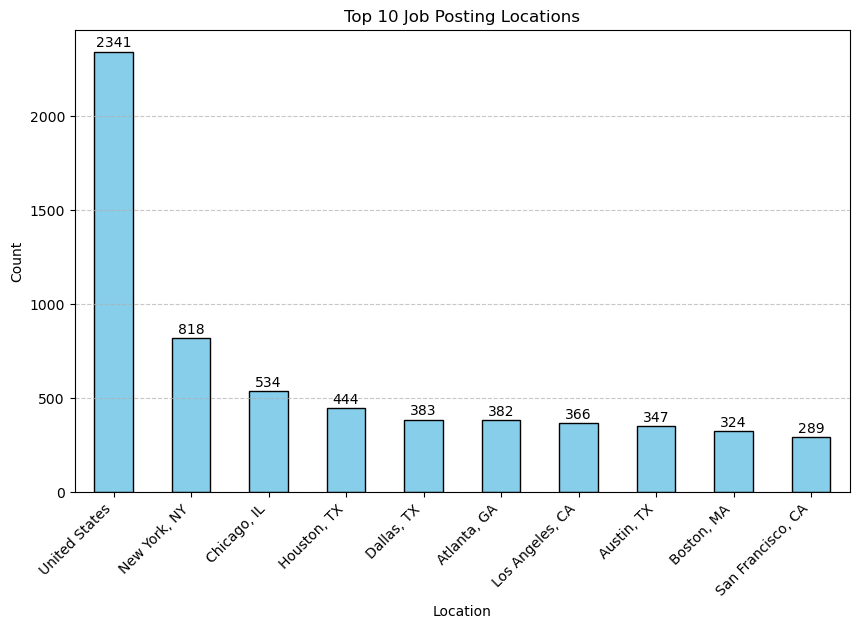

In [118]:
# Explanation: This visualization displays the top 10 job posting locations.

plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='bar', color='skyblue', edgecolor='black')
for i, count in enumerate(top_locations):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.title('Top 10 Job Posting Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualization no.06: Salary Distribution Boxplot

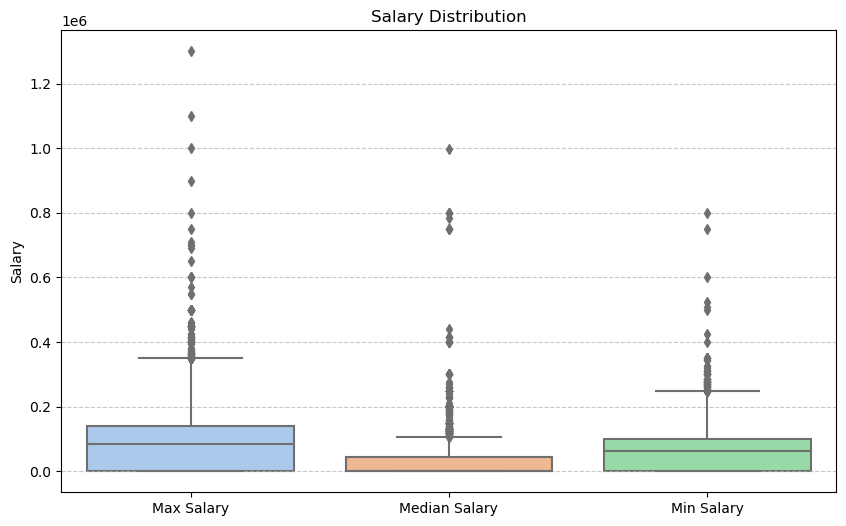

In [119]:
# Explanation: The next visualization illustrates the distribution of salaries using a boxplot.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['max_salary', 'med_salary', 'min_salary']], palette="pastel")
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xticks(ticks=[0, 1, 2], labels=['Max Salary', 'Median Salary', 'Min Salary'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualization no.07: Salary Distribution by Experience Level

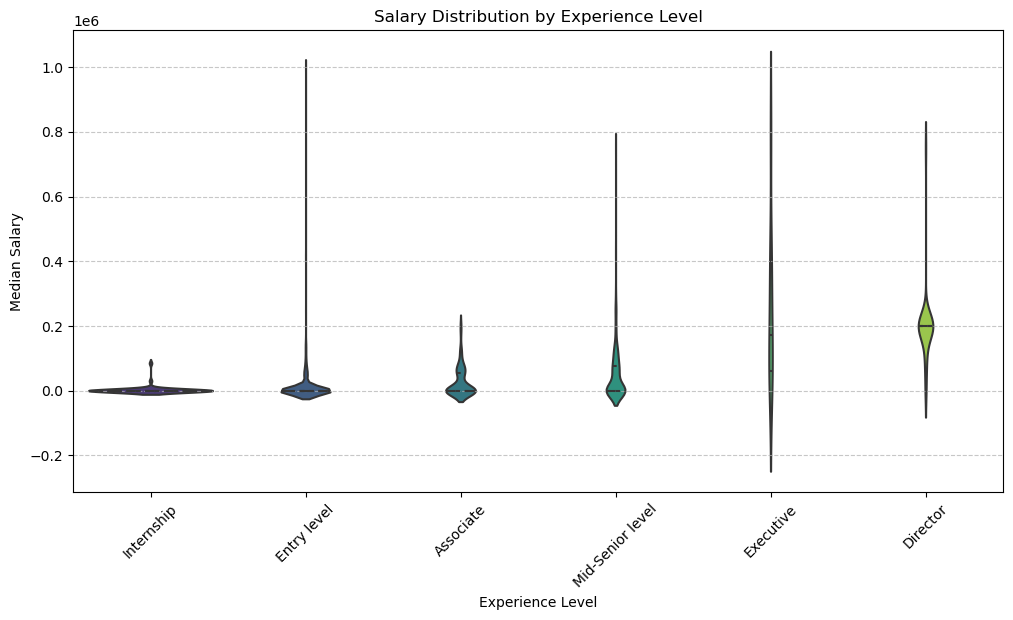

In [120]:
# Explanation: This visualization depicts the salary distribution by experience level.

plt.figure(figsize=(12, 6))
sns.violinplot(x='formatted_experience_level', y='med_salary', data=df, palette='viridis', inner='quartile', order=experience_order)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visualization no.08: Correlation Matrix

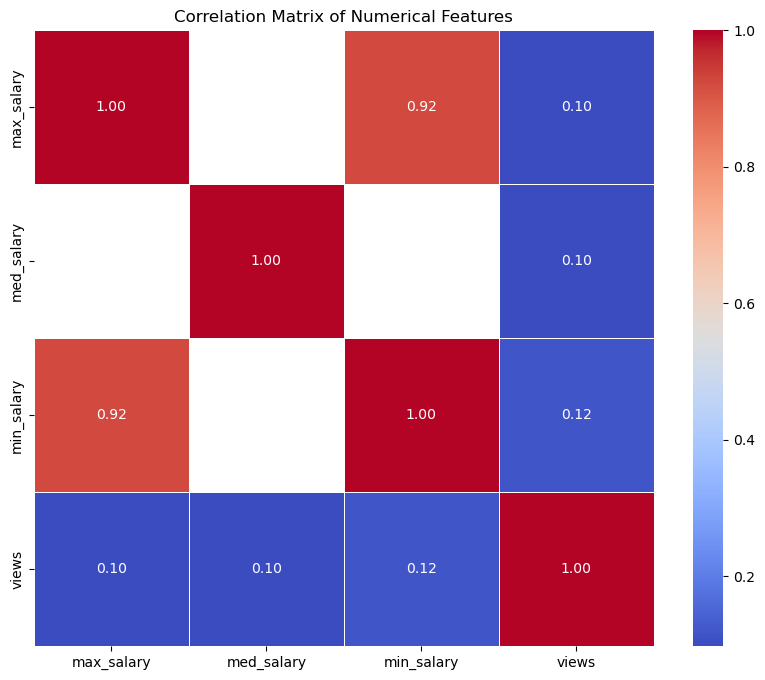

In [121]:
# Explanation: The following heatmap displays the correlation matrix of numerical features.

numerical_columns = ['max_salary', 'med_salary', 'min_salary', 'views']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Splitting the data for classification

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Adjust class weights

In [123]:
class_weights = {0: 1, 1: 1}

## Initialize the RandomForestClassifier model

In [124]:
classification_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights))
])

## Cross-validation

In [125]:
# Explanation: Cross-validation is performed to assess the model's performance.

y_train_pred = cross_val_predict(classification_model, X_train, y_train, cv=5)
cv_scores = cross_val_score(classification_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.50281955 0.49238579 0.49840196 0.49746193 0.50742621]
Mean CV Accuracy: 0.49969908555935805


## Train the classification model

In [126]:
# Explanation: The Random Forest model is trained on the training data.

classification_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['company_id', 'max_salary', 'med_salary', 'min_salary',
       'remote_allowed', 'views'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'formatted_work_type', 'location', 'application_type',
       'formatted_experience_level', 'skills_desc', 'work_type'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 1},
                                        random_state=42))])

## Feature Importance

In [127]:
# Explanation: Feature importance is calculated to understand the contribution of each feature.

feature_names = preprocessor.transformers_[0][2].tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols).tolist()
feature_importance = classification_model.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                                                 Feature    Importance
0                                             company_id  5.424229e-02
5                                                  views  5.111852e-02
1                                             max_salary  2.627147e-02
3                                             min_salary  2.572621e-02
2                                             med_salary  9.786165e-03
...                                                  ...           ...
1384   title_Associate Director of International Recr...  1.287813e-06
1208                     title_Assistant Professor, CPSY  1.264411e-06
18111  title_Volunteer: Tutor Elementary Math to Low-...  8.028919e-07
17602  title_Travel Registered Nurse ER Emergency Roo...  0.000000e+00
4                                         remote_allowed  0.000000e+00

[22960 rows x 2 columns]


## Make predictions for classification

In [128]:
# Explanation: The trained model is used to make predictions on the test data.

y_pred = classification_model.predict(X_test)

## Evaluate the classification model

In [129]:
# Explanation: The performance of the classification model is evaluated using various metrics.

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classification_model.predict_proba(X_test)[:, 1])

print("Classification Model:")
print(f"Accuracy: {accuracy:.2f}")
print("AUC-ROC Score:", roc_auc)
print("\nConfusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)

Classification Model:
Accuracy: 0.51
AUC-ROC Score: 0.5110002663025269

Confusion Matrix:
[[1679 1623]
 [1663 1685]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      3302
           1       0.51      0.50      0.51      3348

    accuracy                           0.51      6650
   macro avg       0.51      0.51      0.51      6650
weighted avg       0.51      0.51      0.51      6650



##  Visualization 8: Confusion Matrix Heatmap

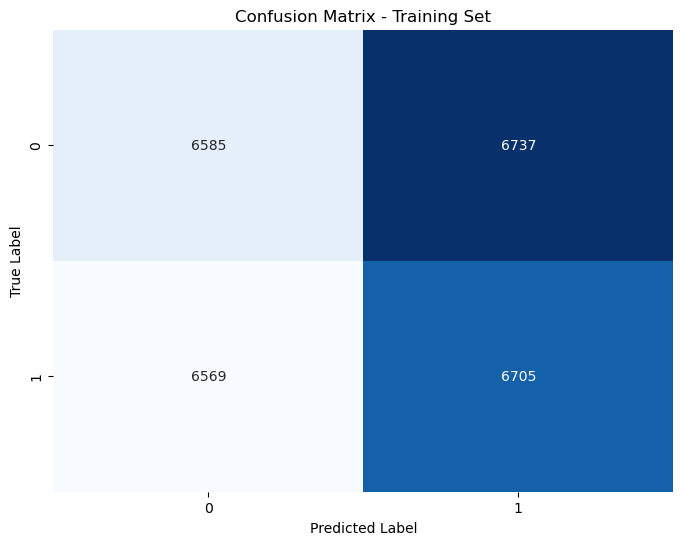

In [130]:
# Explanation: The heatmap illustrates the confusion matrix on the training set.

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Project Overview

---

## Introduction

The hiring process involves a complex interplay of various factors influencing decision-making, crucial for job seekers and employers alike. The project, "Leveraging LinkedIn Data to Identify Key Factors of Hiring Decisions," utilizes data analytics to unravel the key drivers of hiring decisions. The overarching goal is to develop tools and resources aiding job seekers and employers in making more informed hiring decisions.

---

## Objectives

1. **Identify Key Components:** Utilize the LinkedIn job postings dataset to identify the key components influencing hiring decisions.

2. **Develop Predictive Model:** Construct a predictive machine learning model using the Random Forest algorithm to assess the likelihood of a candidate being hired.

3. **Create Tools and Resources:** Develop tools and resources leveraging insights from the project to enhance navigation of the hiring landscape.

4. **Publication:** Publish project findings in a peer-reviewed journal or academic conference.

---

## Methods

### 3.1 Data Collection and Preparation

- Collect the LinkedIn job postings dataset from Kaggle.
- Clean and prepare the data by removing duplicate entries, correcting typos, and handling missing values.

### 3.2 Feature Engineering

- Create new features to enhance the machine learning model's performance.
- Example: Combine candidate education and experience into a single "experience" feature.

### 3.3 Model Selection and Training

- Train a Random Forest model to predict the likelihood of a candidate being hired.
- Random Forest is chosen for its accuracy and ability to handle complex data.

### 3.4 Model Evaluation and Interpretation

- Evaluate the model's performance on a held-out test set.
- Interpret the model's predictions to identify the most crucial elements influencing hiring decisions.

---

## Tools

The project leverages the following tools:

- Python programming language
- Scikit-learn machine learning library
- Pandas data manipulation library
- NLTK natural language processing library (for text analysis)
- Matplotlib and Seaborn for data visualization
- Plotly Express for interactive visualizations

---

## Dataset

The LinkedIn job postings dataset from Kaggle comprises over 100,000 job postings, providing critical insights into job titles, descriptions, locations, salaries, and required skills.

---

## Conclusion

The project aims to contribute to the field of data science and the hiring process by utilizing data analytics to identify key drivers of hiring decisions. The dataset's extensive nature allows for a comprehensive exploration of factors influencing hiring across various dimensions.

---

## References

- A. Kon, "LinkedIn job postings - 2023," Kaggle, [Link](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings) (accessed Sep. 22, 2023).
